# Assignment#2 Image Segmentation

## Problem Statement
We intend to perform image segmentation. Image segmentation means that we can group
similar pixels together and give these grouped pixels the same label. The grouping
problem is a clustering problem. We want to study the use of K-means on the Berkeley
Segmentation Benchmark. Below we will show the needed steps to achieve the goal of
the assignment.

In [106]:
#Reset Variables if memory goes crucial.
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [107]:
#imports cell 
from os import listdir
from PIL import Image as PImage
from PIL import ImageColor as PColor
from random import randint
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from MLalgorithms.clustering_validation import Fmeasure,ConditionalEntropy
from MLalgorithms.clustering import Kmeans,SpectralClustering
from sklearn.metrics.cluster import contingency_matrix
from sklearn.cluster import KMeans

## Step 1 : Download the dataset and understand the format

In [108]:
#Utility Method to loadImages into list and their corresponding ground truth from a given path parameter.
def LoadImagesWithGroundTruth(imgs_root, gt_root,mat_shape):
    # return array of images
    loadedImages = []
    loadedMatFiles = []
    #i =0
    imagesList = listdir(imgs_root)
    #store matrix in memory
    img_mat = np.arange(mat_shape[0] * mat_shape[1]).reshape(mat_shape)
    #store helping variables.
    num_pixels = mat_shape[0] // len(imagesList)
    num_dimen = mat_shape[1]
    count = 0
    #for every image store it in matrix and it's ground truth in list.
    for image in imagesList:
        mat = scipy.io.loadmat(gt_root+image[:-4])
        img = PImage.open(imgs_root + image)
        img_mat[num_pixels*count:num_pixels+(num_pixels*count),:] = np.array(img).reshape(num_pixels,num_dimen)
        for j in range(0,mat['groundTruth'].shape[1]):
            loadedMatFiles.append(mat['groundTruth'][0][j][0][0][0])
        count += 1
    return img_mat,loadedMatFiles

In [109]:
train_path = "./data/images/train/"
test_path = "./data/images/test/"
val_path = "./data/images/val/"
gt_train_path = "./data/groundTruth/train/"
gt_test_path = "./data/groundTruth/test/"
gt_val_path = "./data/groundTruth/val/"

num_pixels = 321*481
num_dimen = 3
num_imgs=200
# store images in lists.
train_set, train_gt = LoadImagesWithGroundTruth(train_path,gt_train_path, (num_pixels*num_imgs,num_dimen))
# test_imgs, test_gt = LoadImagesWithGroundTruth(test_path,gt_test_path, (num_pixels*200,num_dimen))
# val_imgs, val_gt = LoadImagesWithGroundTruth(val_path,gt_val_path, (num_pixels*100,num_dimen))
# print("Length of Trainset = ",len(train_imgs),"\nLength of Testset = ",len(test_imgs),"\nLength of Validationset = ",len(val_imgs))
# print("Length of GroundTruth for Trainset = ",len(train_gt),"\nLength of GroundTruth for Testset = ",len(test_gt),"\nLength of GroundTruth for Validationset = ",len(val_gt))

## Step 2: Visualize the image and the ground truth segmentation

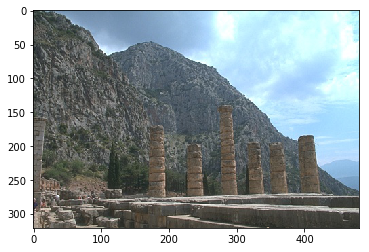

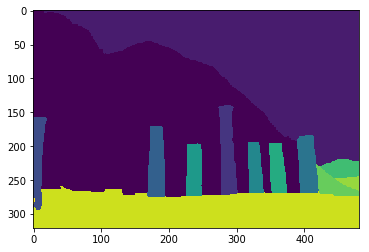

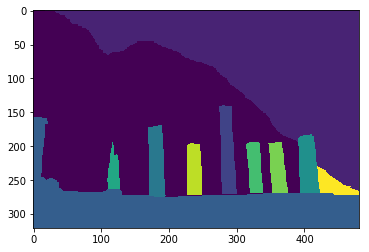

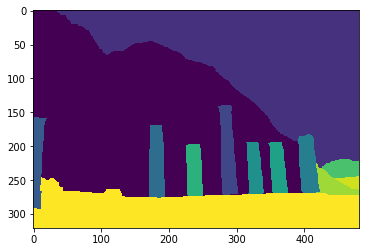

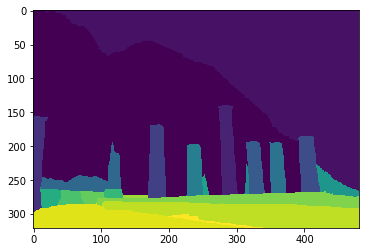

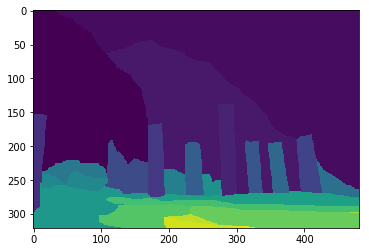

In [195]:
plt.imshow(train_set[0:num_pixels].reshape(321,481,3));
plt.figure();
plt.imshow(train_gt[0]);
plt.figure();
plt.imshow(train_gt[1]);
plt.figure();
plt.imshow(train_gt[2]);
plt.figure();
plt.imshow(train_gt[3]);
plt.figure();
plt.imshow(train_gt[4]);

## Step 3: Segmentation using K-means

#### Every image pixel is a feature vector of 3-dimension {R,G,B}. We will use this feature representation to do the segmentation.
**This is done while loading the dataset and converting it to matrix**

#### We will change the K of the K-means algorithm between {3,5,7,9,11} clusters. You will produce different segmentations and save them as colored images. Every color represents a certain group (cluster) of pixels.

In [152]:
def ClusteriseImages(clusters,data_mat,cluster_num):
    clusterised_mat= np.zeros(data_mat.shape,dtype=np.uint8)
    colors = []
    for i in range(cluster_num):
        colors.append(np.array([randint(0, 255),randint(0, 255),randint(0, 255)]))
    for i in range(data_mat.shape[0]):
        clusterised_mat[i] = colors[clusters[i]]
    return clusterised_mat

In [199]:
clusterised_imgs = []
clusterings = []
for k in range(3,12,2):  
    for count in range(5):
        #get an image
        image = train_set[num_pixels*count:num_pixels+(num_pixels*count)]
        #Using our method.
        #centroids, clusters,error,itern = Kmeans(image,num_clusters=k)
        #Using sklearn method.
        model = KMeans(n_clusters=k, random_state=0).fit(image)
        clusterings.append(model.labels_)
        clusterised_imgs.append(ClusteriseImages(model.labels_,image,k))

### Results of K-Means

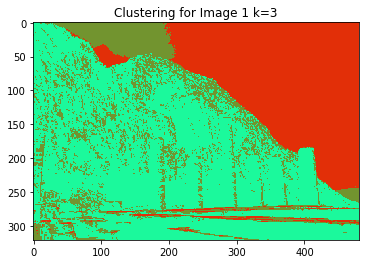

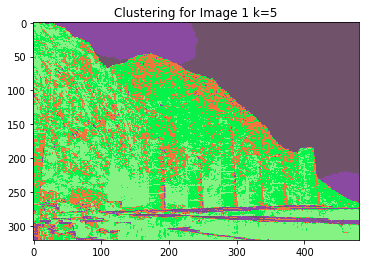

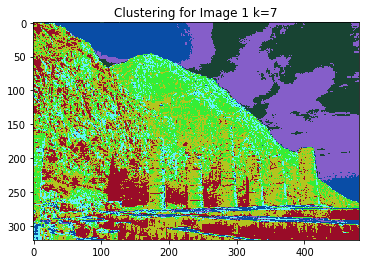

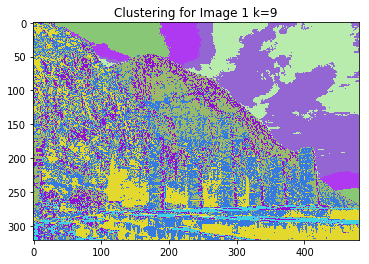

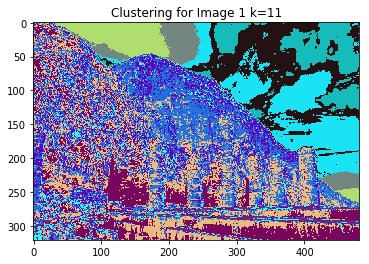

<Figure size 432x288 with 0 Axes>

In [208]:
# k = 3
plt.imshow(clusterised_imgs[0].reshape(321,481,3));
plt.title("Clustering for Image 1 k=3");
plt.figure();
# k = 5
plt.imshow(clusterised_imgs[5].reshape(321,481,3));
plt.title("Clustering for Image 1 k=5");
plt.figure();
#k = 7
plt.imshow(clusterised_imgs[10].reshape(321,481,3));
plt.title("Clustering for Image 1 k=7");
plt.figure();
#k = 9
plt.imshow(clusterised_imgs[15].reshape(321,481,3));
plt.title("Clustering for Image 1 k=9");
plt.figure();
#k = 11
plt.imshow(clusterised_imgs[20].reshape(321,481,3));
plt.title("Clustering for Image 1 k=11");
plt.figure();
#---------------------------------------------------------

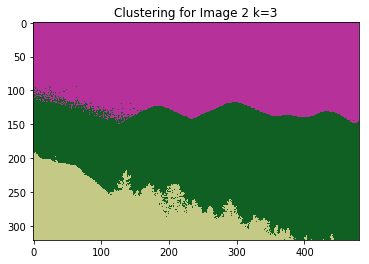

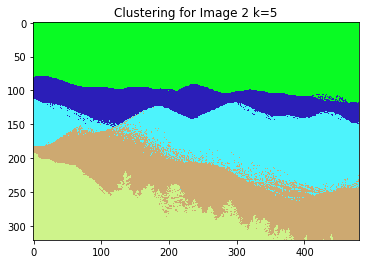

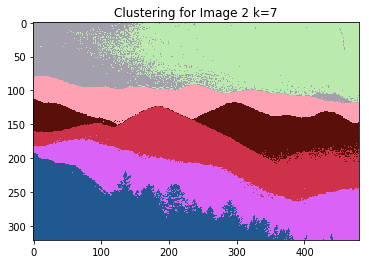

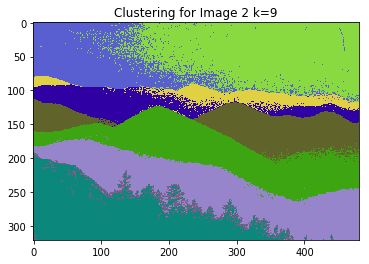

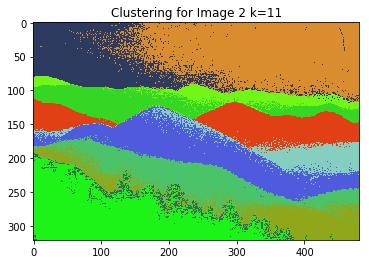

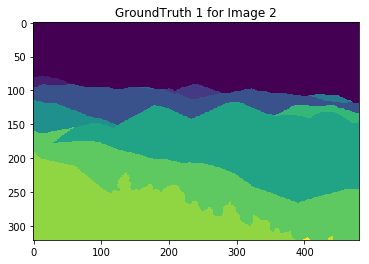

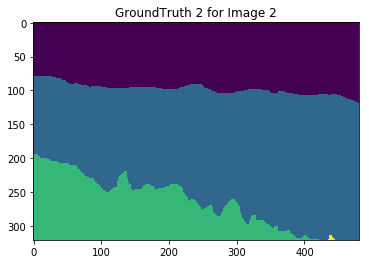

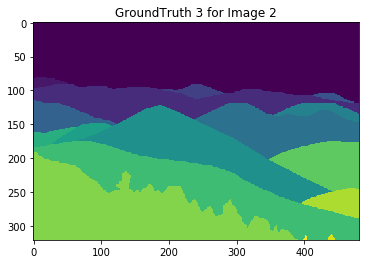

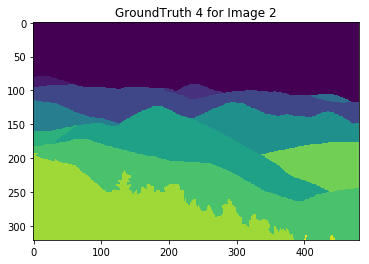

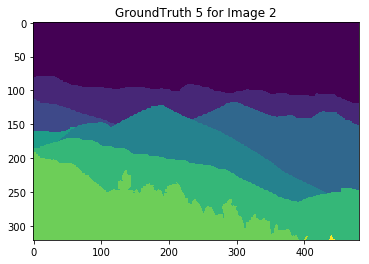

In [209]:
# k = 3
plt.imshow(clusterised_imgs[1].reshape(321,481,3));
plt.title("Clustering for Image 2 k=3");
plt.figure();
# k = 5
plt.imshow(clusterised_imgs[6].reshape(321,481,3));
plt.title("Clustering for Image 2 k=5");
plt.figure();
#k = 7
plt.imshow(clusterised_imgs[11].reshape(321,481,3));
plt.title("Clustering for Image 2 k=7");
plt.figure();
#k = 9
plt.imshow(clusterised_imgs[16].reshape(321,481,3));
plt.title("Clustering for Image 2 k=9");
plt.figure();
#k = 11
plt.imshow(clusterised_imgs[21].reshape(321,481,3));
plt.title("Clustering for Image 2 k=11");
plt.figure()
plt.imshow(train_gt[5]);
plt.title("GroundTruth 1 for Image 2");
plt.figure();
plt.imshow(train_gt[6]);
plt.title("GroundTruth 2 for Image 2");
plt.figure();
plt.imshow(train_gt[7]);
plt.title("GroundTruth 3 for Image 2");
plt.figure();
plt.imshow(train_gt[8]);
plt.title("GroundTruth 4 for Image 2");
plt.figure();
plt.imshow(train_gt[9]);
plt.title("GroundTruth 5 for Image 2");
#------------------------------------------------------

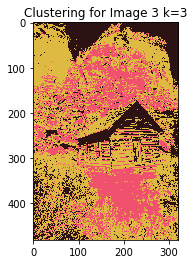

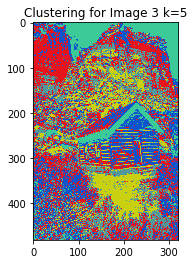

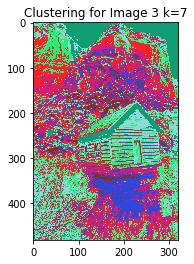

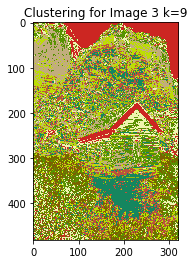

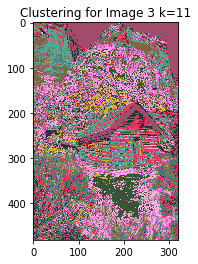

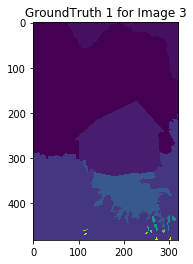

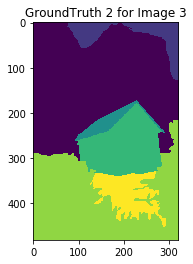

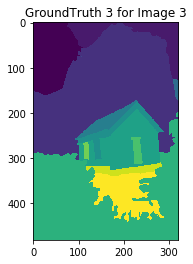

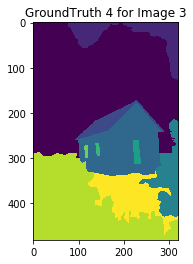

In [210]:
# k = 3
plt.imshow(clusterised_imgs[2].reshape(481,321,3));
plt.title("Clustering for Image 3 k=3");
plt.figure();
# k = 5
plt.imshow(clusterised_imgs[7].reshape(481,321,3));
plt.title("Clustering for Image 3 k=5");
plt.figure();
#k = 7
plt.imshow(clusterised_imgs[12].reshape(481,321,3));
plt.title("Clustering for Image 3 k=7");
plt.figure();
#k = 9
plt.imshow(clusterised_imgs[17].reshape(481,321,3));
plt.title("Clustering for Image 3 k=9");
plt.figure();
#k = 11
plt.imshow(clusterised_imgs[22].reshape(481,321,3));
plt.title("Clustering for Image 3 k=11");
plt.figure();
plt.imshow(train_gt[11]);
plt.title("GroundTruth 1 for Image 3");
plt.figure();
plt.imshow(train_gt[12]);
plt.title("GroundTruth 2 for Image 3");
plt.figure();
plt.imshow(train_gt[13]);
plt.title("GroundTruth 3 for Image 3");
plt.figure();
plt.imshow(train_gt[14]);
plt.title("GroundTruth 4 for Image 3");

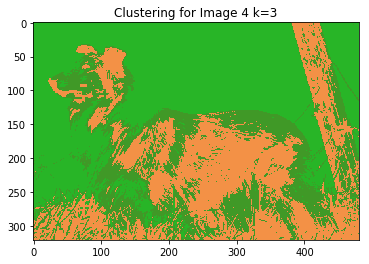

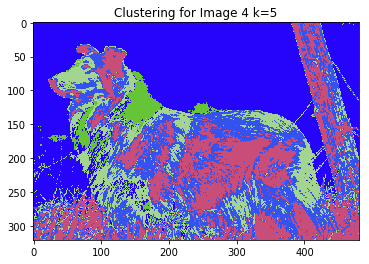

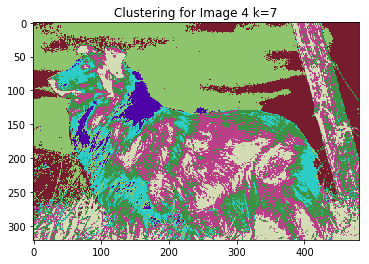

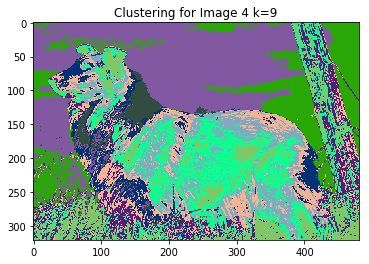

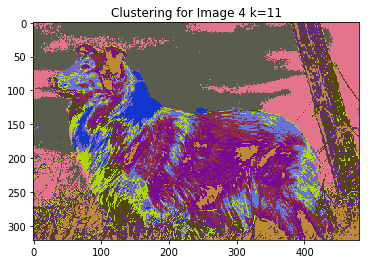

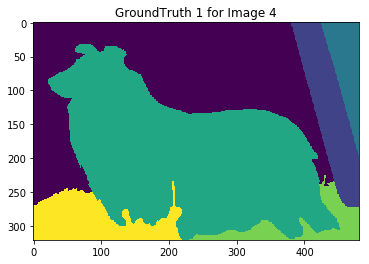

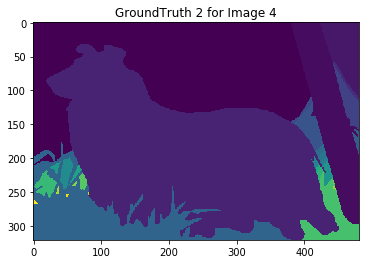

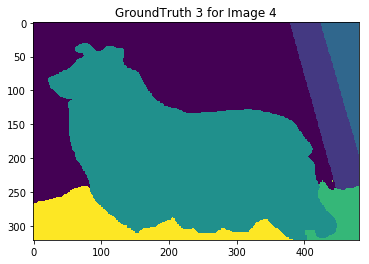

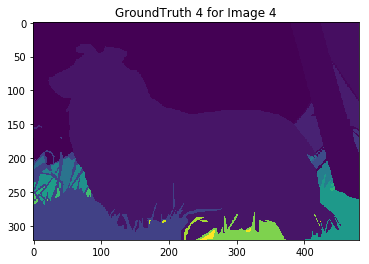

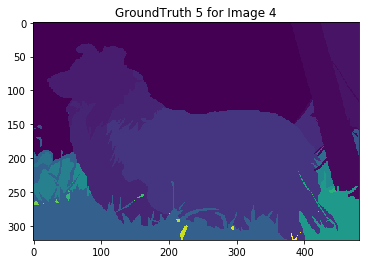

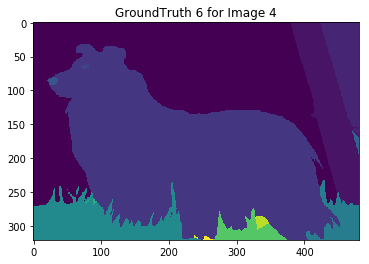

In [214]:
# k = 3
plt.imshow(clusterised_imgs[3].reshape(321,481,3));
plt.title("Clustering for Image 4 k=3");
plt.figure();
# k = 5
plt.imshow(clusterised_imgs[8].reshape(321,481,3));
plt.title("Clustering for Image 4 k=5");
plt.figure();
#k = 7
plt.imshow(clusterised_imgs[13].reshape(321,481,3));
plt.title("Clustering for Image 4 k=7");
plt.figure();
#k = 9
plt.imshow(clusterised_imgs[18].reshape(321,481,3));
plt.title("Clustering for Image 4 k=9");
plt.figure();
#k = 11
plt.imshow(clusterised_imgs[23].reshape(321,481,3));
plt.title("Clustering for Image 4 k=11");
plt.figure()
plt.imshow(train_gt[15]);
plt.title("GroundTruth 1 for Image 4");
plt.figure();
plt.imshow(train_gt[16]);
plt.title("GroundTruth 2 for Image 4");
plt.figure();
plt.imshow(train_gt[17]);
plt.title("GroundTruth 3 for Image 4");
plt.figure();
plt.imshow(train_gt[18]);
plt.title("GroundTruth 4 for Image 4");
plt.figure();
plt.imshow(train_gt[19]);
plt.title("GroundTruth 5 for Image 4");
plt.figure();
plt.imshow(train_gt[20]);
plt.title("GroundTruth 6 for Image 4");

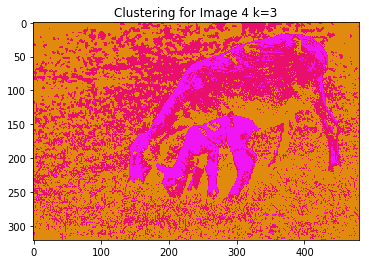

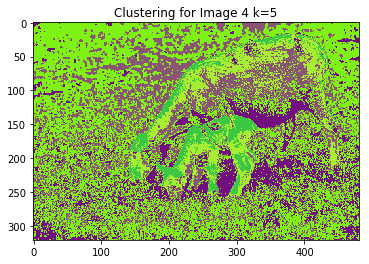

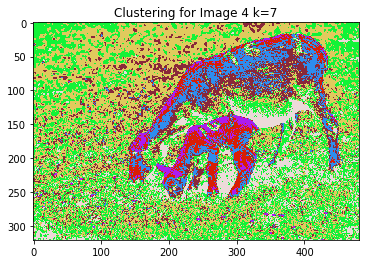

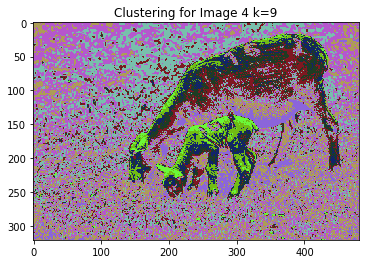

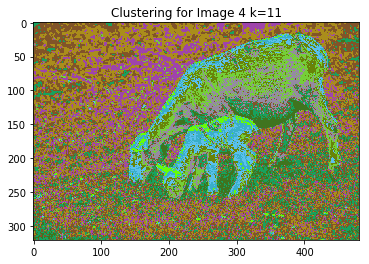

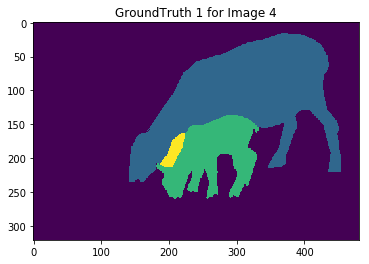

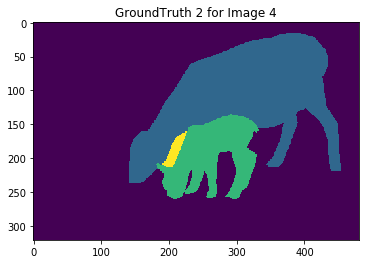

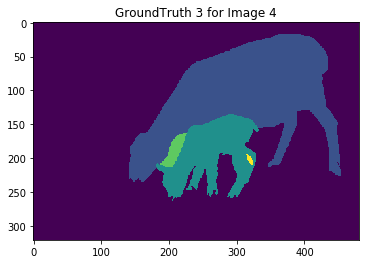

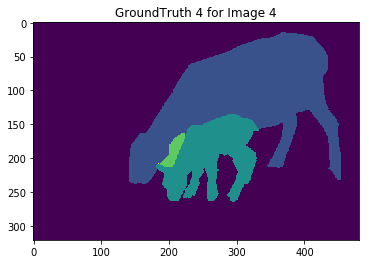

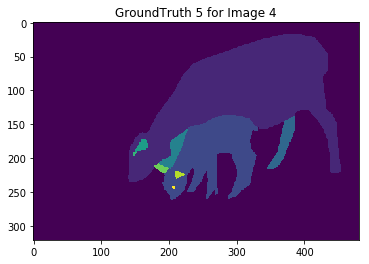

In [213]:
# k = 3
plt.imshow(clusterised_imgs[4].reshape(321,481,3));
plt.title("Clustering for Image 4 k=3");
plt.figure();
# k = 5
plt.imshow(clusterised_imgs[9].reshape(321,481,3));
plt.title("Clustering for Image 4 k=5");
plt.figure();
#k = 7
plt.imshow(clusterised_imgs[14].reshape(321,481,3));
plt.title("Clustering for Image 4 k=7");
plt.figure();
#k = 9
plt.imshow(clusterised_imgs[19].reshape(321,481,3));
plt.title("Clustering for Image 4 k=9");
plt.figure();
#k = 11
plt.imshow(clusterised_imgs[24].reshape(321,481,3));
plt.title("Clustering for Image 4 k=11");
plt.figure()
plt.imshow(train_gt[21]);
plt.title("GroundTruth 1 for Image 4");
plt.figure();
plt.imshow(train_gt[22]);
plt.title("GroundTruth 2 for Image 4");
plt.figure();
plt.imshow(train_gt[23]);
plt.title("GroundTruth 3 for Image 4");
plt.figure();
plt.imshow(train_gt[24]);
plt.title("GroundTruth 4 for Image 4");
plt.figure();
plt.imshow(train_gt[25]);
plt.title("GroundTruth 5 for Image 4");



#### We will evaluate the result segmentation using F-measure, Conditional Entropy for image I with M available ground-truth segmentations and for a clustering of K-clusters you will report your measures M times and the average of the M trials as well. <br>Report average per dataset as well.

For k =  3  and Ground Truth image =  1  Fmeasure is  0.6291952252056544
For k =  3  and Ground Truth image =  2  Fmeasure is  0.6318479445144111
For k =  3  and Ground Truth image =  3  Fmeasure is  0.6300637589413917
For k =  3  and Ground Truth image =  4  Fmeasure is  0.6249094377881698
For k =  3  and Ground Truth image =  5  Fmeasure is  0.5259720821278074
For k =  5  and Ground Truth image =  1  Fmeasure is  0.49239639017793707
For k =  5  and Ground Truth image =  2  Fmeasure is  0.4965625378779041
For k =  5  and Ground Truth image =  3  Fmeasure is  0.49250547861270366
For k =  5  and Ground Truth image =  4  Fmeasure is  0.49279129964543944
For k =  5  and Ground Truth image =  5  Fmeasure is  0.4581137522829489
For k =  7  and Ground Truth image =  1  Fmeasure is  0.4036743149517128
For k =  7  and Ground Truth image =  2  Fmeasure is  0.40527973152494595
For k =  7  and Ground Truth image =  3  Fmeasure is  0.4037429208072242
For k =  7  and Ground Truth image =  4  Fmeasu

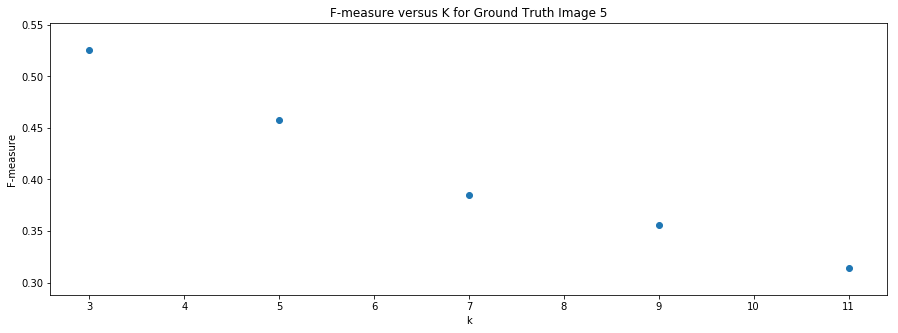

In [217]:
def Fmeasure(clusters,partitions):
    F= 0
    contigencyTable =contingency_matrix(clusters,partitions)
    idx=contigencyTable.argmax(axis=1)
    for i in range(contigencyTable.shape[0]):
        nij = contigencyTable.max(axis=1)[i]
        ni = np.sum(contigencyTable[i])
        ji = contigencyTable[:,idx[i]]
        mji = np.sum(ji)
        F += 2 * nij/(ni+mji)
    return F/contigencyTable.shape[0]
k = [3,5,7,9,11]
F = []
count=0
for j in range(0,25,5):
    for i in range(0,5):
        gt_img = train_gt[i].reshape(481*321)
        f = Fmeasure(clusterings[j],gt_img)
        print("For k = ",k[count]," and Ground Truth image = ",i+1," Fmeasure is ",f)
    count +=1
    F.append(f)
print("Average of the M trials = ",sum(F)/len(F))
plt.scatter(k,F)
plt.title('F-measure versus K for Ground Truth Image 5');
plt.gcf().set_size_inches(15,5);
plt.xlabel('k');
plt.ylabel('F-measure');

For k =  3  and Ground Truth image =  1  Conditional Entropy is  0.8003794292251966
For k =  3  and Ground Truth image =  2  Conditional Entropy is  0.7486868538907221
For k =  3  and Ground Truth image =  3  Conditional Entropy is  0.7922262902447548
For k =  3  and Ground Truth image =  4  Conditional Entropy is  1.0179823545532958
For k =  3  and Ground Truth image =  5  Conditional Entropy is  1.4082706522781414
For k =  5  and Ground Truth image =  1  Conditional Entropy is  1.0893207741303388
For k =  5  and Ground Truth image =  2  Conditional Entropy is  1.0163857818267301
For k =  5  and Ground Truth image =  3  Conditional Entropy is  1.0793339454188093
For k =  5  and Ground Truth image =  4  Conditional Entropy is  1.36667074243244
For k =  5  and Ground Truth image =  5  Conditional Entropy is  1.8812121231592458
For k =  7  and Ground Truth image =  1  Conditional Entropy is  1.5222339214103737
For k =  7  and Ground Truth image =  2  Conditional Entropy is  1.44779289087

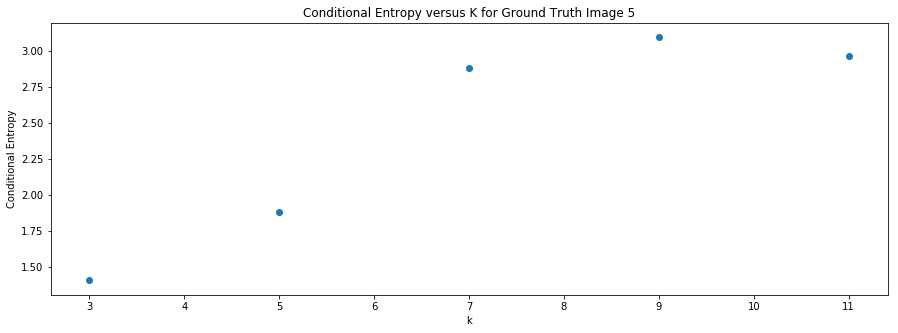

In [224]:
def ConditionalEntropy(clusters,partitions):
    contigencyTable = contingency_matrix(clusters, partitions)
    if(~contigencyTable.all()):
        for i in range(contigencyTable.shape[0]):
            for j in range(contigencyTable.shape[1]):
                if(contigencyTable[i][j] == 0): contigencyTable[i][j]=1
    H = []
    Hci = 0
    for i in range(contigencyTable.shape[0]):
        ni = np.sum(contigencyTable[i])
        for j in range(contigencyTable.shape[1]):
            Hci -= (contigencyTable[i][j]/ni) * (np.log2(contigencyTable[i][j]/ni))
        H.append(Hci*ni)  
    return sum(H)/(154401*3)

k = [3,5,7,9,11]
H = []
count=0
for j in range(0,25,5):
    for i in range(0,5):
        gt_img = train_gt[i].reshape(481*321)
        h = ConditionalEntropy(clusterings[j],gt_img)
        print("For k = ",k[count]," and Ground Truth image = ",i+1," Conditional Entropy is ",h)
    count +=1
    H.append(h)
print("Average of the M trials = ",sum(H)/len(H))
plt.scatter(k,H)
plt.title('Conditional Entropy versus K for Ground Truth Image 5');
plt.gcf().set_size_inches(15,5);
plt.xlabel('k');
plt.ylabel('Conditional Entropy');

## Step 5 : Extra, Adding Spatial Features

In the previous parts, we used the color features RGB. We didn’t encode
the layout of the pixels. We want to modify that for K-means clustering to
encode the spatial layout of the pixels

In [149]:
spatial_train_set=np.arange(num_pixels*num_imgs*5).reshape(num_pixels*num_imgs,5)
spatial_add = []
for i in range(5):
    for j in range(321):
        for k in range(481):
            spatial_add.append([j,k])
data = train_set[0:num_pixels+(num_pixels*4)]
spatial_train_set =np.hstack([data,spatial_add])

In [173]:
def ClusteriseSpatialImages(clusters,data_mat,cluster_num):
    clusterised_mat= np.zeros(data_mat.shape,dtype=np.uint8)
    colors = []
    for i in range(cluster_num):
        colors.append(np.array([randint(0, 255),randint(0, 255),randint(0, 255)]))
    for i in range(data_mat.shape[0]):
        clusterised_mat[i] = colors[clusters[i]]
    return clusterised_mat

In [175]:
clusterised_imgs = []
clusterings = []
for k in range(3,12,2):  
    for count in range(5):
        #get an image
        image = spatial_train_set[num_pixels*count:num_pixels+(num_pixels*count)]
        without_spatial_image = spatial_train_set[num_pixels*count:num_pixels+(num_pixels*count),0:3]
        #Using our method.
        #centroids, clusters,error,itern = Kmeans(image,num_clusters=k)
        #Using sklearn method.
        model = KMeans(n_clusters=k, random_state=0).fit(image)
        clusterings.append(model.labels_)
        clusterised_imgs.append(ClusteriseSpatialImages(model.labels_,without_spatial_image,k))

#### Displaying the results of modifiying the K-means with spatial feature.

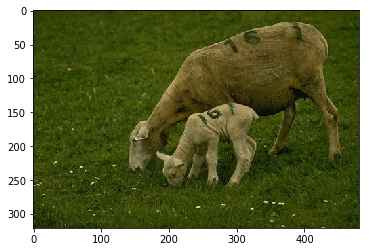

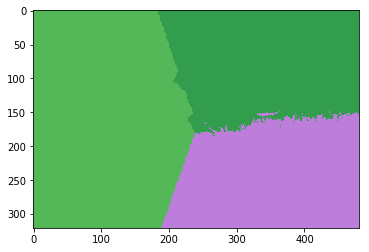

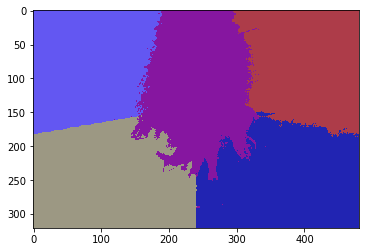

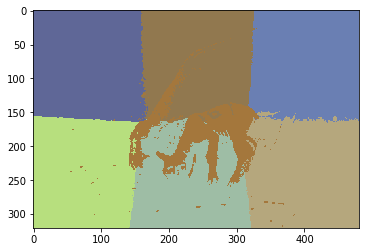

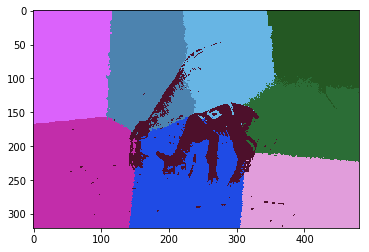

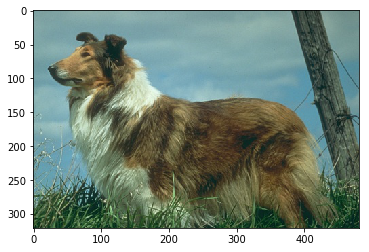

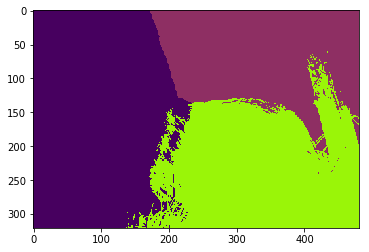

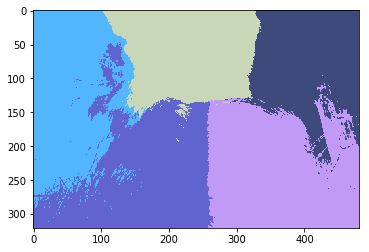

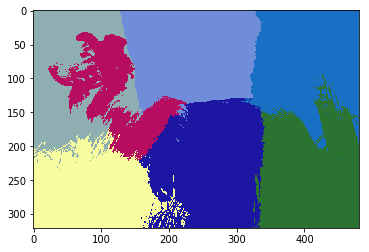

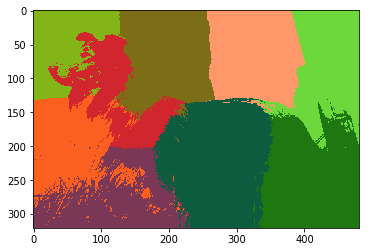

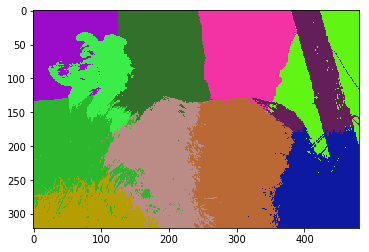

In [198]:
plt.imshow(train_set[num_pixels*4:num_pixels+num_pixels*4].reshape(321,481,3));
plt.figure()
# k = 3
plt.imshow(clusterised_imgs[4].reshape(321,481,3));
plt.figure();
# k = 5
plt.imshow(clusterised_imgs[9].reshape(321,481,3));
plt.figure();
#k = 7
plt.imshow(clusterised_imgs[14].reshape(321,481,3));
plt.figure();
#k = 9
plt.imshow(clusterised_imgs[19].reshape(321,481,3));
plt.figure();
#k = 11
plt.imshow(clusterised_imgs[24].reshape(321,481,3));
#----------------------------------------------------
plt.imshow(train_set[num_pixels*3:num_pixels+num_pixels*3].reshape(321,481,3));
plt.figure()
# k = 3
plt.imshow(clusterised_imgs[3].reshape(321,481,3));
plt.figure();
# k = 5
plt.imshow(clusterised_imgs[8].reshape(321,481,3));
plt.figure();
#k = 7
plt.imshow(clusterised_imgs[13].reshape(321,481,3));
plt.figure();
#k = 9
plt.imshow(clusterised_imgs[18].reshape(321,481,3));
plt.figure();
#k = 11
plt.imshow(clusterised_imgs[23].reshape(321,481,3));